<a href="https://colab.research.google.com/github/iMan0405/Portfolio_DT_vs_AI/blob/main/Basic_Image_Manipulations_for_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asosiy tasvirni manipulatsiya qilish

### Ushbu notebookda biz tasvirni qanday o'zgartirishni ko'rib chiqamiz, jumladan:

Rasm piksellariga kirish va ularni boshqarish
Tasvir hajmini o'zgartirish
Kesish
Aytish

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

# Aktivlarni yuklash

### Download_and_unzip(...) Notebook aktivlarini yuklab olish va chiqarib olish uchun ishlatiladi.

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Urllib paketi yordamida zip faylni yuklab olish.
    urlretrieve(url, save_path)

    try:
        # Zipfile paketi yordamida zip faylni chiqarib olish.
        with ZipFile(save_path) as z:
            # ZIP fayl mazmunini bir xil katalogdan chiqarib oling.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB2.zip")

# Assest ZIP mavjud bo'lmasa, yuklab olish.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

# Asl shaxmat taxtasi tasviri

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

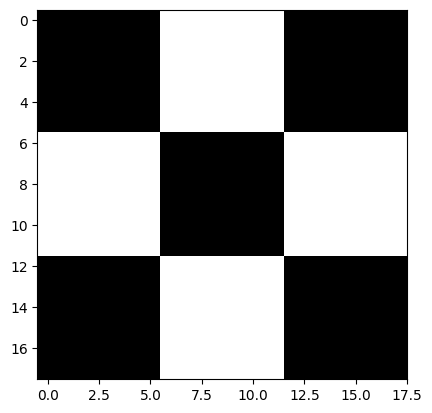

In [4]:
# Rasmni kulrang shkala sifatida o'qish
cb_img = cv2.imread("checkerboard_18x18.png", 0)

# To'g'ri ko'rsatish uchun rangli xaritani kulrang shkalaga o'rnating
plt.imshow(cb_img, cmap="gray")
print(cb_img)

# Individual piksellarga kirish

### Keling, rasmdagi pikselga qanday kirishni ko'rib chiqaylik.
### Numpy matritsadagi istalgan pikselga kirish uchun siz matritsa [r,c] kabi matritsa belgilaridan foydalanishingiz kerak, bunda r satr raqami va c ustun raqamidir. Bundan tashqari, matritsa 0 indeksli ekanligini unutmang.
### Misol uchun, agar siz birinchi pikselga kirishni istasangiz, matritsani [0,0] belgilashingiz kerak. Keling, ba'zi misollar bilan ko'rib chiqaylik. Yuqoridan chapdan bitta qora piksel va yuqori markazdan bitta oq piksel chop etamiz.

In [5]:
# birinchi qora qutining birinchi pikselini chop etish
print(cb_img[0, 0])
# birinchi qora qutining o'ng tomonidagi birinchi oq pikselni chop etish
print(cb_img[0, 6])

0
255


# Rasm piksellarini o'zgartirish

### Biz piksellarning intensivlik qiymatlarini yuqorida tavsiflangan tarzda o'zgartirishimiz mumkin.

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0 200 200   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0 200 200   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0 200 200   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0 200 200   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

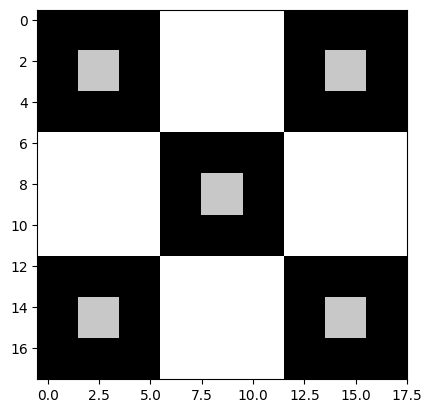

In [6]:
cb_img_copy = cb_img.copy()
cb_img_copy[2, 2] = 200
cb_img_copy[2, 3] = 200
cb_img_copy[3, 2] = 200
cb_img_copy[3, 3] = 200
cb_img_copy[2, 14] = 200
cb_img_copy[2, 15] = 200
cb_img_copy[3, 14] = 200
cb_img_copy[3, 15] = 200
cb_img_copy[8, 8] = 200
cb_img_copy[8, 9] = 200
cb_img_copy[9, 8] = 200
cb_img_copy[9, 9] = 200
cb_img_copy[14, 2] = 200
cb_img_copy[14, 3] = 200
cb_img_copy[15, 2] = 200
cb_img_copy[15, 3] = 200
cb_img_copy[14, 14] = 200
cb_img_copy[14, 15] = 200
cb_img_copy[15, 14] = 200
cb_img_copy[15, 15] = 200

plt.imshow(cb_img_copy, cmap="gray")
print(cb_img_copy)

# Tasvirlarni kesish

### Tasvirni kesish oddiygina tasvirning muayyan (piksel) hududini tanlash orqali amalga oshiriladi.

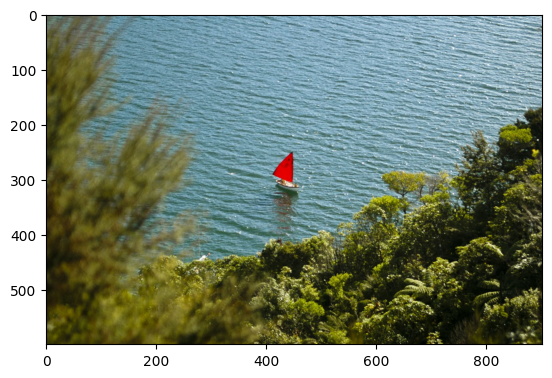

In [8]:
img_NZ_bgr = cv2.imread("New_Zealand_Boat.jpg", cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:, :, ::-1]

plt.imshow(img_NZ_rgb)

## Rasmning o'rta qismini kesib olish

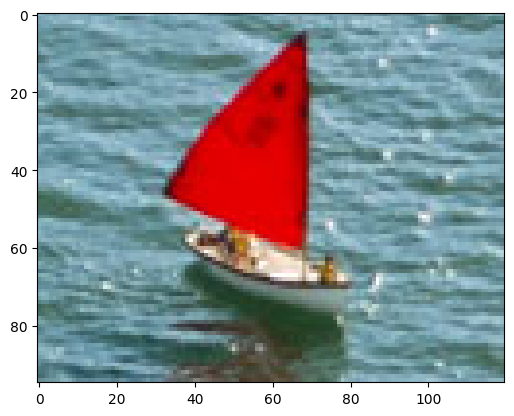

In [25]:
cropped_region = img_NZ_rgb[245:340, 380:500]
plt.imshow(cropped_region)